# Initiation

### Load modules you are going to use

- Python Data Analysis Library (pandas)
- SAS Grid (saspy)
- R (rpy2)

### Open a SAS session on the C1B SAS Grid

In [3]:
import pandas as pd
import saspy
import rpy2

sas = saspy.SASsession(cfigname='winiomlinux')

Using SAS Config named: winiomlinux
SAS Connection established. Subprocess id is 3552



### Get Data using SAS

Steps:
1. Paste <b> ada = sas.submitLST(""" </b> into code cell
2. Write SAS code to create views (not tables)
3. Paste <b> """) </b> to close SAS code
4. Set value of Python data frame (you can call it anythign example shows apDat)
   <b> apDat = sas.sd2df('AppStatusByState') </b>
5. Display dataframe by calling it's name
   <b> apDat <b/>

In [5]:
ada = sas.submitLST("""

proc sql;

create view AppStatusByState as
select STATUS_NAME,STATE_CODE,count(*) as NbrOfApps
from CASRPT.V_APPLICATION_STATUS_CI a
join CASRPT.V_APPLICANT_CI b
on a.APPLICATION_ID = b.APPLICATION_ID
join CASRPT.V_APPLICANT_CI c on b.APPLICANT_ID = c.APPLICANT_ID
join CASRPT.V_CITY_STATE_ZIP d on c.CITY_STATE_ZIP_ID = d.CITY_STATE_ZIP_ID
join CASRPT.V_STATE e on d.STATE_ID = e.STATE_ID
where APPLICATION_RECEIVE_DATE between '1MAR2023:00:00:00'dt and '8MAR2023:00:00:00'dt
group by STATUS_NAME,STATE_CODE
;

create view SalesByState as
select State,
sum(case when Division  ='Payment' then Amount else 0 end) as Payments,
sum(case when Division  ='Sale' then Amount else 0 end) as Sales
from newdw.facttransaction a
join newdw.dimTransactionCategory b on a.dimTransactionCategoryID = b.dimTransactionCategoryID
join newdw.dimLocation c on a.dimLocationID = c.dimLocationID
where ReportingDate between '1MAR2023:00:00:00'dt and '8MAR2023:00:00:00'dt
and Division in ('Sale','Payment')
and region in ('South East','Mid West','North East','South West','West')
group by State
;


""")

apDat = sas.sd2df('AppStatusByState')
apDat
slDat = sas.sd2df('SalesByState')
slDat

State     Payments        Sales
0     NJ -16608228.58  12244905.49
1     WA  -8731418.23   6736536.09
2     MD -11349828.72   8054778.94
3     WV  -3010050.57   2120230.08
4     NM  -3098362.34   2174313.64
5     OH -18727520.73  13027972.27
6     AL  -8018993.66   5562593.79
7     IN -10063679.26   7103473.26
8     KS  -3383737.16   2504163.27
9     HI  -1900997.24   1406157.82
10    NY -31959496.90  21660896.48
11    OK  -6034574.37   4286022.65
12    OR  -4860024.86   3354088.14
13    SC  -8278210.71   6092663.60
14    SD   -925068.74    699741.49
15    FL -50286191.61  38239182.06
16    GA -22602126.64  16542219.44
17    IA  -3428190.23   2486609.20
18    ID  -2122142.45   1574318.60
19    LA  -7068913.36   4912999.07
20    NC -17620738.08  12873692.95
21    CT  -6245176.93   4377866.27
22    KY  -6305598.22   4384199.56
23    ND   -881097.11    679014.53
24    RI  -1951418.21   1289065.75
25    AZ -12332701.83   9255038.79
26    IL -19880119.01  14358144.95
27    MA -10474161.68   7206110.10
28    MS  -5654902.95   3617007.55
29    WI  -7114510.47   5194620.62
30    CO  -8975723.65   6760764.06
31    MO  -9001610.58   6620023.65
32    PA -19753235.24  13918149.65
33    NH  -2042871.43   1539158.32
34    VA -12032613.23   8689744.26
35    ME  -1936932.22   1187743.43
36    MT  -1437427.88   1080131.41
37    AR  -5127998.80   3454545.99
38    NV  -7673722.59   5928488.64
39    UT  -3040579.21   2429890.89
40    AK   -918644.77    770077.99
41    CA -59548911.56  42961525.06
42    DC   -929300.44    665039.71
43    MN  -5817546.77   4660409.86
44    NE  -2222603.06   1712905.78
45    TX -50599010.81  37973820.19
46    VT   -823930.51    601437.80
47    TN -10187491.65   7555748.86
48    DE  -1932466.35   1496404.31
49    MI -14821894.03  10636303.64
50    WY   -818381.21    587759.47

In [53]:
import site; site.getsitepackages()
import site,markdown
import site,metakernel

In [1]:
from iPython.display import Markdown

ModuleNotFoundError: No module named 'iPython'

In [58]:
apRows = len(apDat.index) 
trRows = len(slDat.index) 

Markdown(f"""

## Dataframes created successfully 

Applications has {apRows} rows
Transactions has {trRows} rows


""")#datamine


NameError: name 'Markdown' is not defined

In [1]:
import numpy as np
apDat['isBoarded'] = np.where(apDat['STATUS_NAME']=='Boarding',True, False)
apStatus = apDat.groupby(['STATE_CODE', 'isBoarded'], as_index =False).agg({'NbrOfApps':'sum'})
apStatus


NameError: name 'apDat' is not defined

In [4]:
apStatusp = apStatus.pivot(index='STATE_CODE',columns='isBoarded',values='NbrOfApps').reset_index()
apStatusp["ttlBoards"] = apStatusp[False]+ apStatusp[True]
apStatusp["BoardsRate"] = apStatusp[True]/ apStatusp['ttlBoards']*100
apStatusp

isBoarded STATE_CODE   False     True  ttlBoards  BoardsRate
0                 AK   108.0    161.0      269.0   59.851301
1                 AL  1804.0   2124.0     3928.0   54.073320
2                 AR  1073.0   1242.0     2315.0   53.650108
3                 AZ  1737.0   2709.0     4446.0   60.931174
4                 CA  8297.0  12117.0    20414.0   59.356324
5                 CO  1108.0   1962.0     3070.0   63.908795
6                 CT   896.0   1159.0     2055.0   56.399027
7                 DC   171.0    190.0      361.0   52.631579
8                 DE   313.0    409.0      722.0   56.648199
9                 FL  7485.0   9454.0    16939.0   55.812031
10                GA  4523.0   4871.0     9394.0   51.852246
11                HI   216.0    279.0      495.0   56.363636
12                IA   603.0    868.0     1471.0   59.007478
13                ID   281.0    495.0      776.0   63.788660
14                IL  3334.0   4628.0     7962.0   58.126099
15                IN  1979.0   2539.0     4518.0   56.197432
16                KS   602.0    889.0     1491.0   59.624413
17                KY  1338.0   1674.0     3012.0   55.577689
18                LA  1385.0   1561.0     2946.0   52.987101
19                MA  1259.0   1802.0     3061.0   58.869650
20                MD  1574.0   2076.0     3650.0   56.876712
21                ME   243.0    404.0      647.0   62.442040
22                MI  2507.0   3214.0     5721.0   56.178990
23                MN   896.0   1243.0     2139.0   58.111267
24                MO  1728.0   2437.0     4165.0   58.511405
25                MS  1195.0   1211.0     2406.0   50.332502
26                MT   205.0    351.0      556.0   63.129496
27                NC  3301.0   4146.0     7447.0   55.673426
28                ND   176.0    264.0      440.0   60.000000
29                NE   378.0    570.0      948.0   60.126582
30                NH   257.0    387.0      644.0   60.093168
31                NJ  2267.0   2786.0     5053.0   55.135563
32                NM   467.0    690.0     1157.0   59.636992
33                NV  1531.0   1934.0     3465.0   55.815296
34                NY  5670.0   5798.0    11468.0   50.558075
35                OH  3371.0   4596.0     7967.0   57.687963
36                OK  1207.0   1683.0     2890.0   58.235294
37                OR   642.0   1006.0     1648.0   61.043689
38                PA  3537.0   4333.0     7870.0   55.057179
39                PR     4.0      NaN        NaN         NaN
40                RI   285.0    307.0      592.0   51.858108
41                SC  1620.0   1861.0     3481.0   53.461649
42                SD   154.0    216.0      370.0   58.378378
43                TN  2193.0   2485.0     4678.0   53.120992
44                TX  8059.0  11431.0    19490.0   58.650590
45                UT   418.0    757.0     1175.0   64.425532
46                VA  2077.0   2573.0     4650.0   55.333333
47                VT   107.0    147.0      254.0   57.874016
48                WA  1145.0   1862.0     3007.0   61.922182
49                WI  1222.0   1778.0     3000.0   59.266667
50                WV   736.0    887.0     1623.0   54.651879
51                WY   118.0    219.0      337.0   64.985163

In [10]:
from functools import partial
from rpy2.ipython import html
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")
import rpy2.robjects.lib.ggplot2 as gp
from rpy2.robjects import pandas2ri
pandas2ri.activate()

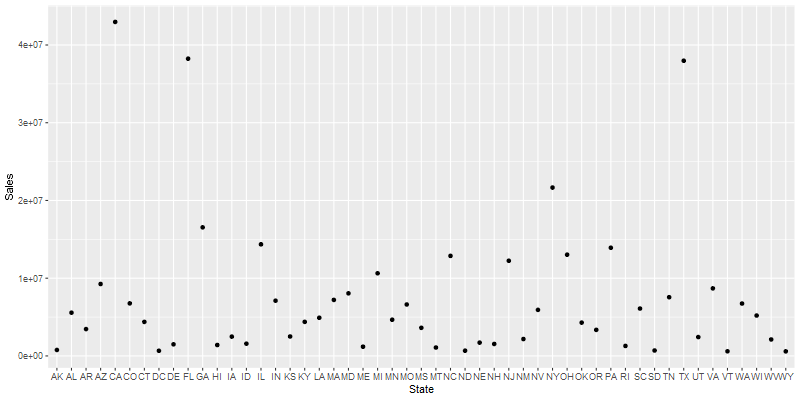

In [16]:

p = (gp.ggplot(slDat) +
     gp.aes_string(x='State',
                   y='Sales') +
     gp.geom_point() +
     gp.scale_color_continuous(trans='log10'))
from rpy2.ipython.ggplot import image_png
image_png(p)

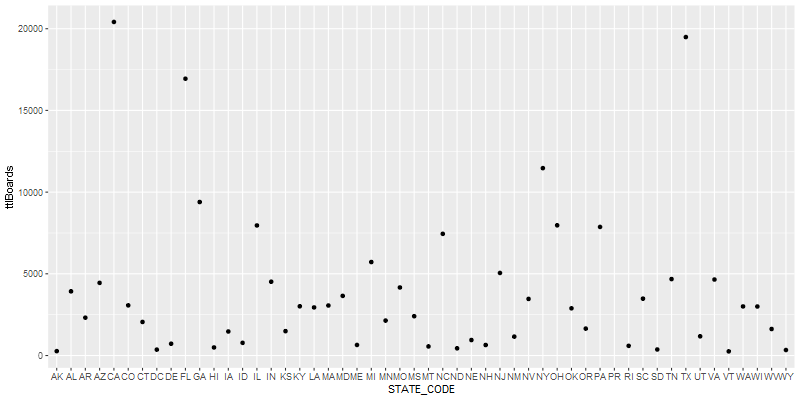

In [18]:
p2 = (gp.ggplot(apStatusp) +
     gp.aes_string(x='STATE_CODE',
                   y='ttlBoards') +
     gp.geom_point() +
     gp.scale_color_continuous(trans='log10'))
from rpy2.ipython.ggplot import image_png
image_png(p2)

In [ ]:
gfg = df.to_markdown()
  
print(gfg)